<a href="https://colab.research.google.com/github/Thisumi1/telco-churn-prediction/blob/main/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TELCO CUSTOMER CHURN PREDICTION - EXPLORATORY DATA ANALYSIS

**Module:** CM2604 Machine Learning  
**Task:** Binary Classification - Customer Churn Prediction  
**Author:** Thisumi Ranaisinghe (20240854/2425435)  
**Date:** December 2025  
**GitHub:** https://github.com/Thisumi1/telco-churn-prediction

---

## Table of Contents
1. [Introduction & Objectives](#1-introduction)
2. [Dataset Overview](#2-dataset-overview)
3. [Data Quality Assessment](#3-data-quality)
4. [Target Variable Analysis](#4-target-analysis)
5. [Demographic Features Analysis](#5-demographics)
6. [Service Features Analysis](#6-services)
7. [Account Features Analysis](#7-account)
8. [Numerical Features Analysis](#8-numerical)
9. [Correlation Analysis](#9-correlation)
10. [Key Insights & Conclusions](#10-conclusions)

## 1. Introduction & Objectives <a id='1-introduction'></a>

**Business Problem:** Customer churn is a critical issue for telecommunications companies. Predicting which customers are likely to leave allows companies to implement retention strategies proactively.

**Objective:** Perform comprehensive exploratory data analysis to:
- Understand the dataset structure and quality
- Identify patterns and relationships affecting customer churn
- Discover insights to guide feature engineering and model development
- Assess class imbalance for appropriate model selection

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Color palette for churn visualization
COLORS = {'No': '#10b981', 'Yes': '#ef4444'}  # Green for No, Red for Yes
PALETTE = ['#10b981', '#ef4444']

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Dataset Overview <a id='2-dataset-overview'></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/MLCoursework/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Total Customers: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1] - 1} (excluding target)")

Mounted at /content/drive
DATASET OVERVIEW

Dataset Shape: 7043 rows × 21 columns
Total Customers: 7,043
Total Features: 20 (excluding target)


In [4]:
# Display first few rows
print("\nFirst 5 Rows of Dataset:")
df.head()


First 5 Rows of Dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Dataset info
print("\nDataset Information:")
print("-"*80)
df.info()


Dataset Information:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null  

In [6]:
# Feature categorization
print("\n" + "="*80)
print("FEATURE CATEGORIZATION")
print("="*80)

feature_categories = {
    'Identifier': ['customerID'],
    'Demographics': ['gender', 'SeniorCitizen', 'Partner', 'Dependents'],
    'Services': ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
    'Account': ['Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure'],
    'Charges': ['MonthlyCharges', 'TotalCharges'],
    'Target': ['Churn']
}

for category, features in feature_categories.items():
    print(f"\n{category} ({len(features)} features):")
    print(f"  {features}")


FEATURE CATEGORIZATION

Identifier (1 features):
  ['customerID']

Demographics (4 features):
  ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

Services (9 features):
  ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

Account (4 features):
  ['Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure']

Charges (2 features):
  ['MonthlyCharges', 'TotalCharges']

Target (1 features):
  ['Churn']


## 3. Data Quality Assessment <a id='3-data-quality'></a>

In [7]:
print("="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

# Missing values analysis
print("\n3.1 Missing Values Analysis:")
print("-"*40)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing Count'] > 0] if missing.sum() > 0 else "No missing values detected!")

DATA QUALITY ASSESSMENT

3.1 Missing Values Analysis:
----------------------------------------
No missing values detected!


In [8]:
# Check for hidden whitespace/empty string values in ALL columns
print("\n3.2 Whitespace/Empty String Analysis:")
print("-"*40)

# Check all columns for whitespace values
whitespace_found = False
for col in df.columns:
    if df[col].dtype == 'object':  # Only check string columns
        whitespace_count = (df[col] == ' ').sum()
        empty_count = (df[col] == '').sum()

        if whitespace_count > 0 or empty_count > 0:
            whitespace_found = True
            print(f"'{col}': {whitespace_count} whitespace, {empty_count} empty strings")

if not whitespace_found:
    print("No whitespace or empty string values found in other columns!")
else:
    print("\n⚠️ These values will become NaN when converted to numeric during preprocessing")

# Show details for TotalCharges (the problematic column)
whitespace_tc = (df['TotalCharges'] == ' ').sum()
if whitespace_tc > 0:
    print(f"\nDetails for TotalCharges ({whitespace_tc} whitespace values):")
    print("-"*40)
    whitespace_rows = df[df['TotalCharges'] == ' '][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']]
    print(whitespace_rows.to_string())
    print("\n✅ All have tenure=0 (new customers) - will impute with MonthlyCharges in preprocessing")






3.2 Whitespace/Empty String Analysis:
----------------------------------------
'TotalCharges': 11 whitespace, 0 empty strings

⚠️ These values will become NaN when converted to numeric during preprocessing

Details for TotalCharges (11 whitespace values):
----------------------------------------
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             
3331  7644-OMVMY       0           19.85             
3826  3213-VVOLG       0           25.35             
4380  2520-SGTTA       0           20.00             
5218  2923-ARZLG       0           19.70             
6670  4075-WKNIU       0           73.35             
6754  2775-SEFEE       0           61.90             

✅ All have tenure=0 (new customers) - will impute wit

In [9]:
# Check TotalCharges - it's stored as object, needs conversion
print("\n3.2 Data Type Issues:")
print("-"*40)
print(f"TotalCharges dtype: {df['TotalCharges'].dtype}")

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaN after conversion
total_charges_null = df['TotalCharges'].isnull().sum()
print(f"TotalCharges null values after conversion: {total_charges_null}")

# Investigate null TotalCharges
if total_charges_null > 0:
    print(f"\nRows with null TotalCharges (likely new customers with tenure=0):")
    print(df[df['TotalCharges'].isnull()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())


3.2 Data Type Issues:
----------------------------------------
TotalCharges dtype: object
TotalCharges null values after conversion: 11

Rows with null TotalCharges (likely new customers with tenure=0):
      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           NaN
753   3115-CZMZD       0           20.25           NaN
936   5709-LVOEQ       0           80.85           NaN
1082  4367-NUYAO       0           25.75           NaN
1340  1371-DWPAZ       0           56.05           NaN


In [10]:
# Duplicate check
print("\n3.3 Duplicate Records:")
print("-"*40)
duplicates = df.duplicated().sum()
duplicate_ids = df['customerID'].duplicated().sum()
print(f"Duplicate rows: {duplicates}")
print(f"Duplicate customer IDs: {duplicate_ids}")


3.3 Duplicate Records:
----------------------------------------
Duplicate rows: 0
Duplicate customer IDs: 0


In [11]:
# Unique values per column
print("\n3.4 Unique Values per Feature:")
print("-"*40)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


3.4 Unique Values per Feature:
----------------------------------------
customerID: 7043 unique values
gender: 2 unique values
SeniorCitizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
tenure: 73 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
MonthlyCharges: 1585 unique values
TotalCharges: 6530 unique values
Churn: 2 unique values


## 4. Target Variable Analysis (Churn) <a id='4-target-analysis'></a>

In [12]:
print("="*80)
print("TARGET VARIABLE ANALYSIS - CHURN")
print("="*80)

# Churn distribution
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print("\nChurn Distribution:")
print("-"*40)
for label in ['No', 'Yes']:
    print(f"  {label}: {churn_counts[label]:,} customers ({churn_pct[label]:.1f}%)")

# Class imbalance ratio
imbalance_ratio = churn_counts['No'] / churn_counts['Yes']
print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1 (No:Yes)")
print("\n⚠️ Note: Dataset is imbalanced. Consider techniques like SMOTE, class weights,")
print("   or appropriate evaluation metrics (F1, ROC-AUC) during model training.")

TARGET VARIABLE ANALYSIS - CHURN

Churn Distribution:
----------------------------------------
  No: 5,174 customers (73.5%)
  Yes: 1,869 customers (26.5%)

Class Imbalance Ratio: 2.77:1 (No:Yes)

⚠️ Note: Dataset is imbalanced. Consider techniques like SMOTE, class weights,
   or appropriate evaluation metrics (F1, ROC-AUC) during model training.


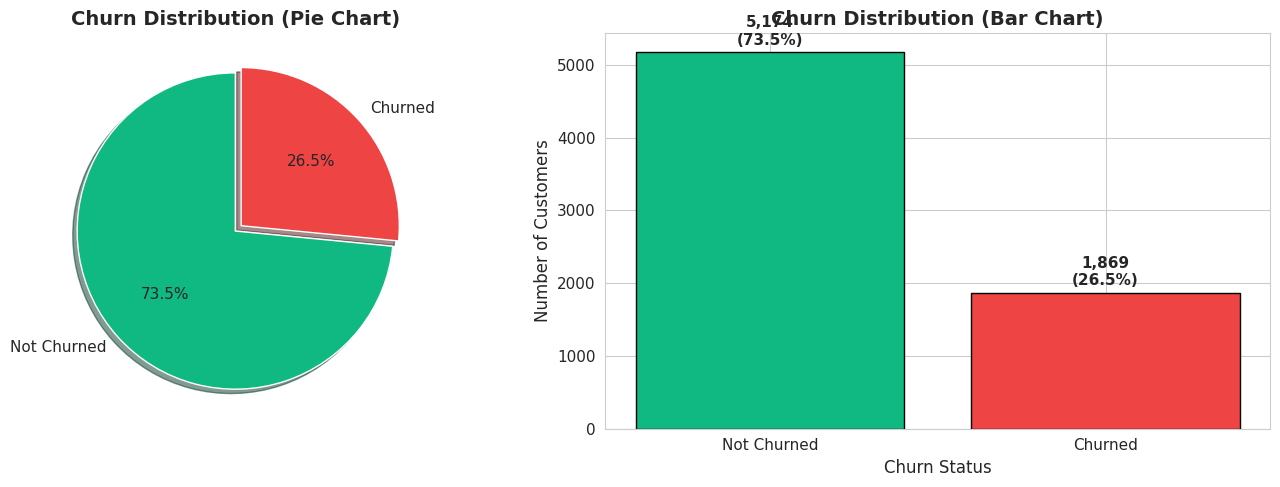


📊 Figure saved: 01_churn_distribution.png


In [13]:
# Visualization: Churn Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
axes[0].pie(churn_counts.values, labels=['Not Churned', 'Churned'],
            autopct='%1.1f%%', colors=PALETTE, startangle=90,
            explode=(0, 0.05), shadow=True)
axes[0].set_title('Churn Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# Bar chart
bars = axes[1].bar(['Not Churned', 'Churned'], churn_counts.values, color=PALETTE, edgecolor='black')
axes[1].set_title('Churn Distribution (Bar Chart)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Churn Status', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)

# Add value labels on bars
for bar, count, pct in zip(bars, churn_counts.values, churn_pct.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
                 f'{count:,}\n({pct:.1f}%)', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MLCoursework/figures/eda/01_churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Figure saved: 01_churn_distribution.png")

## 5. Demographic Features Analysis <a id='5-demographics'></a>

In [14]:
print("="*80)
print("DEMOGRAPHIC FEATURES ANALYSIS")
print("="*80)

demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Convert SeniorCitizen to categorical for visualization
df['SeniorCitizen_Label'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

print("\nChurn Rate by Demographic Features:")
print("-"*40)
for feature in demographic_features:
    if feature == 'SeniorCitizen':
        feature_to_use = 'SeniorCitizen_Label'
    else:
        feature_to_use = feature

    churn_rate = df.groupby(feature_to_use)['Churn'].value_counts(normalize=True).unstack() * 100
    print(f"\n{feature}:")
    print(churn_rate.round(1))

DEMOGRAPHIC FEATURES ANALYSIS

Churn Rate by Demographic Features:
----------------------------------------

gender:
Churn     No   Yes
gender            
Female  73.1  26.9
Male    73.8  26.2

SeniorCitizen:
Churn                  No   Yes
SeniorCitizen_Label            
No                   76.4  23.6
Yes                  58.3  41.7

Partner:
Churn      No   Yes
Partner            
No       67.0  33.0
Yes      80.3  19.7

Dependents:
Churn         No   Yes
Dependents            
No          68.7  31.3
Yes         84.5  15.5


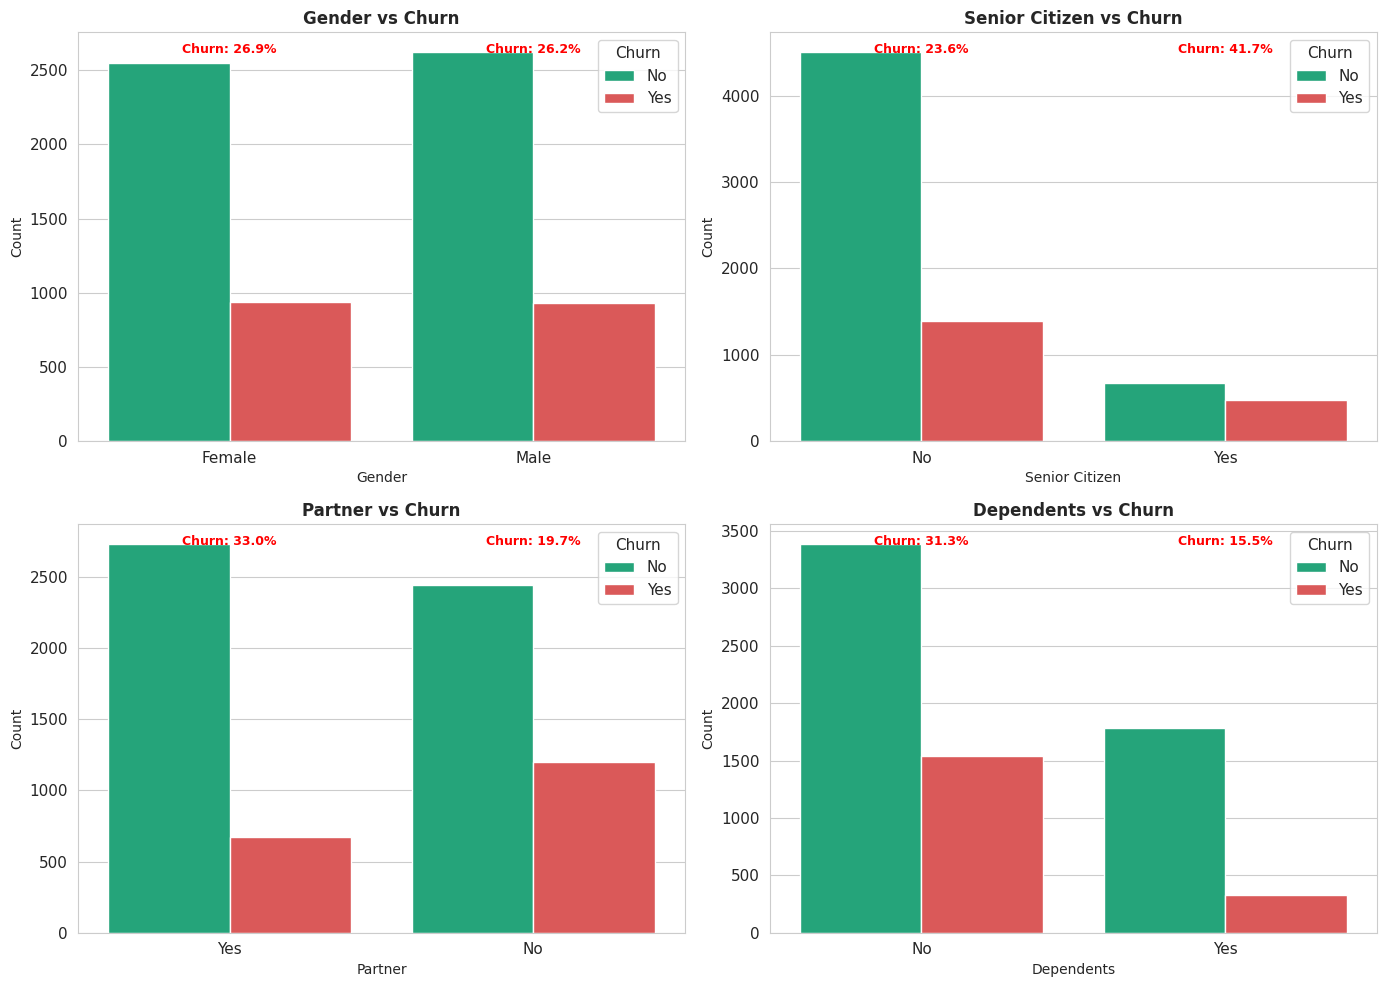


📊 Figure saved: 02_demographics_vs_churn.png


In [15]:
# Visualization: Demographics vs Churn
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

demo_features_plot = ['gender', 'SeniorCitizen_Label', 'Partner', 'Dependents']
titles = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']

for idx, (feature, title) in enumerate(zip(demo_features_plot, titles)):
    ax = axes[idx // 2, idx % 2]

    # Calculate churn rate
    churn_rate = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)

    # Create grouped bar chart
    sns.countplot(data=df, x=feature, hue='Churn', palette=PALETTE, ax=ax)
    ax.set_title(f'{title} vs Churn', fontsize=12, fontweight='bold')
    ax.set_xlabel(title, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.legend(title='Churn', loc='upper right')

    # Add churn rate annotation
    for i, rate in enumerate(churn_rate.values):
        ax.annotate(f'Churn: {rate:.1f}%', xy=(i, ax.get_ylim()[1]*0.95),
                    ha='center', fontsize=9, color='red', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MLCoursework/figures/eda/02_demographics_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Figure saved: 02_demographics_vs_churn.png")

### Demographic Insights:
- **Gender:** Churn rate is similar for both males and females (~26-27%), indicating gender is not a strong predictor
- **Senior Citizens:** Higher churn rate (~41%) compared to non-seniors (~24%) - significant factor
- **Partner:** Customers without partners have higher churn (~33%) vs those with partners (~20%)
- **Dependents:** Customers without dependents churn more (~31%) vs those with dependents (~15%)

## 6. Service Features Analysis <a id='6-services'></a>

In [16]:
print("="*80)
print("SERVICE FEATURES ANALYSIS")
print("="*80)

service_features = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

print("\nChurn Rate by Service Features:")
print("-"*40)
for feature in service_features:
    churn_rate = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
    print(f"\n{feature}:")
    for val, rate in churn_rate.items():
        print(f"  {val}: {rate:.1f}%")

SERVICE FEATURES ANALYSIS

Churn Rate by Service Features:
----------------------------------------

PhoneService:
  No: 24.9%
  Yes: 26.7%

InternetService:
  DSL: 19.0%
  Fiber optic: 41.9%
  No: 7.4%

OnlineSecurity:
  No: 41.8%
  No internet service: 7.4%
  Yes: 14.6%

OnlineBackup:
  No: 39.9%
  No internet service: 7.4%
  Yes: 21.5%

DeviceProtection:
  No: 39.1%
  No internet service: 7.4%
  Yes: 22.5%

TechSupport:
  No: 41.6%
  No internet service: 7.4%
  Yes: 15.2%

StreamingTV:
  No: 33.5%
  No internet service: 7.4%
  Yes: 30.1%

StreamingMovies:
  No: 33.7%
  No internet service: 7.4%
  Yes: 29.9%


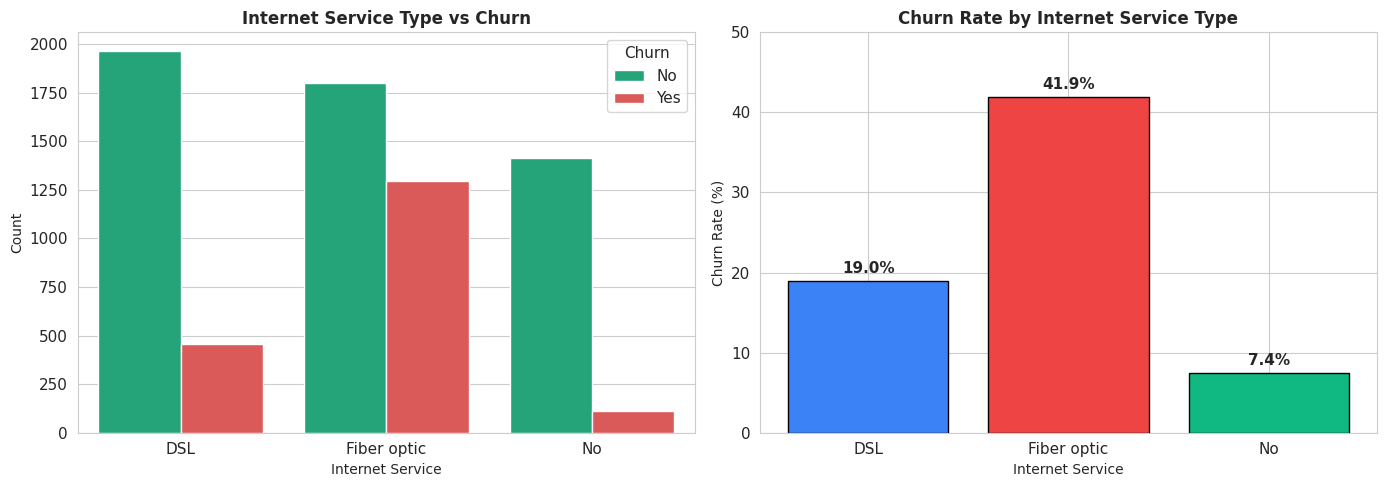


📊 Figure saved: 03_internet_service_vs_churn.png


In [17]:
# Visualization: Internet Service vs Churn (Key Feature)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Internet Service distribution
sns.countplot(data=df, x='InternetService', hue='Churn', palette=PALETTE, ax=axes[0])
axes[0].set_title('Internet Service Type vs Churn', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Internet Service', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)

# Churn rate by internet service
internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
bars = axes[1].bar(internet_churn.index, internet_churn.values, color=['#3b82f6', '#ef4444', '#10b981'], edgecolor='black')
axes[1].set_title('Churn Rate by Internet Service Type', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Internet Service', fontsize=10)
axes[1].set_ylabel('Churn Rate (%)', fontsize=10)
axes[1].set_ylim(0, 50)

for bar in bars:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{bar.get_height():.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MLCoursework/figures/eda/03_internet_service_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Figure saved: 03_internet_service_vs_churn.png")

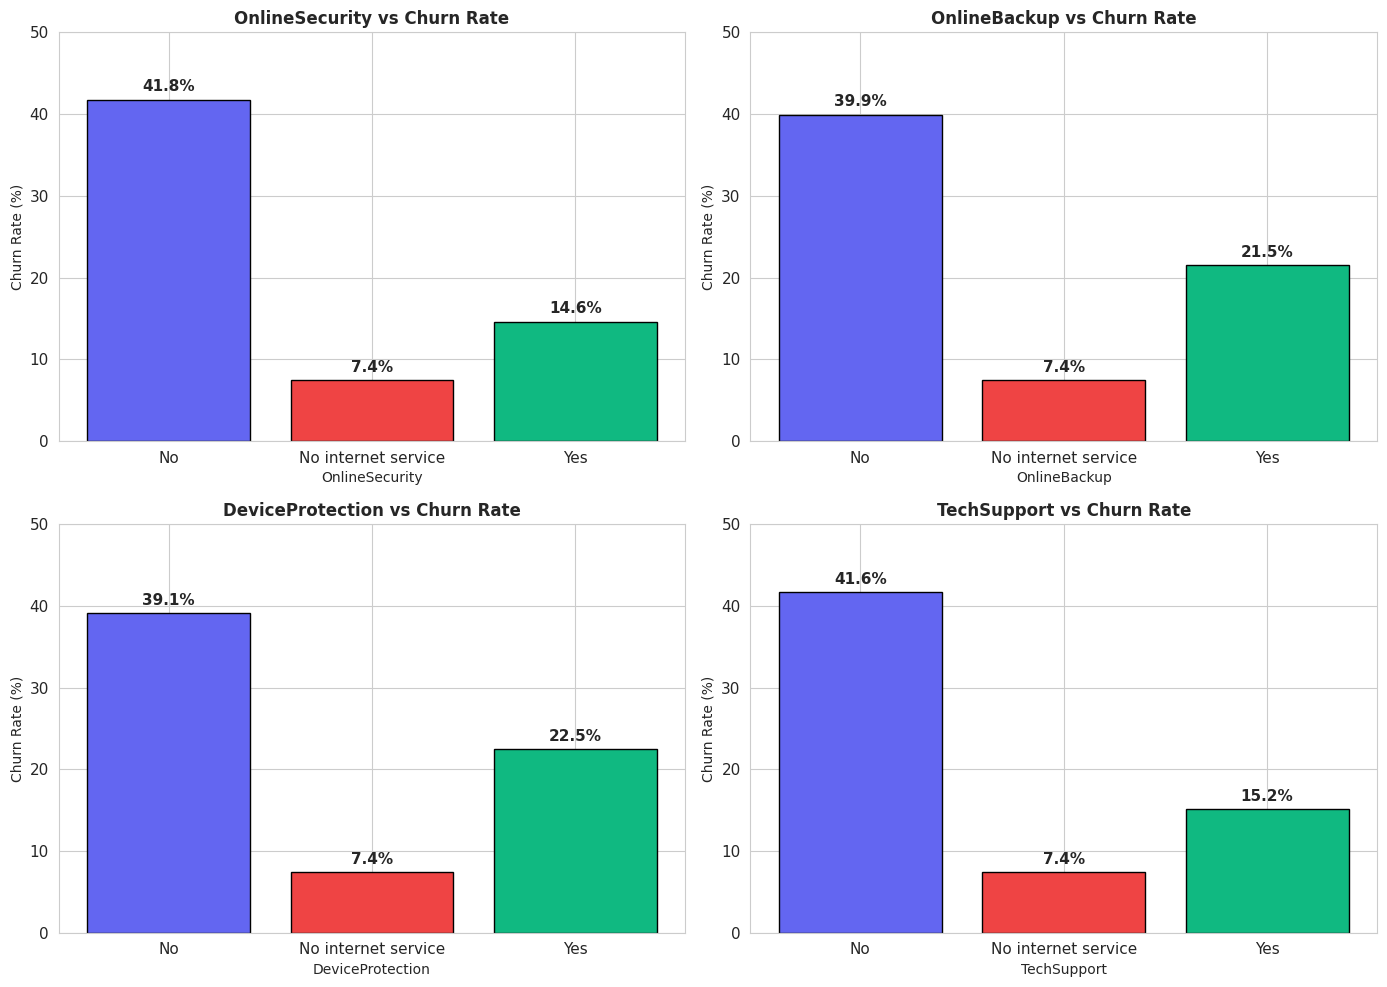


📊 Figure saved: 04_security_services_vs_churn.png


In [18]:
# Visualization: Security & Support Services vs Churn
security_features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, feature in enumerate(security_features):
    ax = axes[idx // 2, idx % 2]

    churn_rate = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
    bars = ax.bar(churn_rate.index, churn_rate.values, color=['#6366f1', '#ef4444', '#10b981'], edgecolor='black')
    ax.set_title(f'{feature} vs Churn Rate', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Churn Rate (%)', fontsize=10)
    ax.set_ylim(0, 50)

    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{bar.get_height():.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MLCoursework/figures/eda/04_security_services_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Figure saved: 04_security_services_vs_churn.png")

### Service Insights:
- **Fiber Optic Internet:** Highest churn rate (~42%) - possibly due to competition or pricing
- **No Internet Service:** Lowest churn (~7%) - suggests satisfied basic users
- **Security/Support Services:** Customers WITHOUT these services have significantly higher churn (~40%) compared to those WITH them (~15-17%)
- **Key Finding:** Offering security and support services appears to increase customer retention

## 7. Account Features Analysis <a id='7-account'></a>

In [19]:
print("="*80)
print("ACCOUNT FEATURES ANALYSIS")
print("="*80)

account_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

print("\nChurn Rate by Account Features:")
print("-"*40)
for feature in account_features:
    churn_rate = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
    print(f"\n{feature}:")
    for val, rate in churn_rate.sort_values(ascending=False).items():
        print(f"  {val}: {rate:.1f}%")

ACCOUNT FEATURES ANALYSIS

Churn Rate by Account Features:
----------------------------------------

Contract:
  Month-to-month: 42.7%
  One year: 11.3%
  Two year: 2.8%

PaperlessBilling:
  Yes: 33.6%
  No: 16.3%

PaymentMethod:
  Electronic check: 45.3%
  Mailed check: 19.1%
  Bank transfer (automatic): 16.7%
  Credit card (automatic): 15.2%


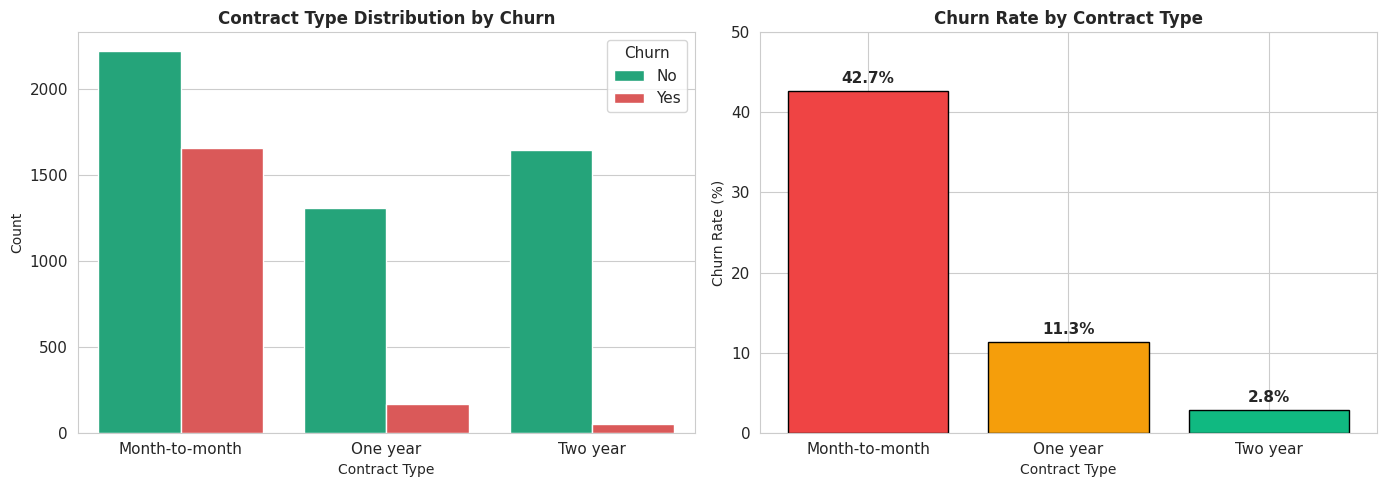


📊 Figure saved: figures/05_contract_vs_churn.png


In [20]:
# Visualization: Contract Type vs Churn (MOST IMPORTANT FEATURE)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Contract distribution with churn
contract_order = ['Month-to-month', 'One year', 'Two year']
sns.countplot(data=df, x='Contract', hue='Churn', palette=PALETTE, ax=axes[0], order=contract_order)
axes[0].set_title('Contract Type Distribution by Churn', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Contract Type', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)

# Churn rate by contract
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100).reindex(contract_order)
bars = axes[1].bar(contract_churn.index, contract_churn.values, color=['#ef4444', '#f59e0b', '#10b981'], edgecolor='black')
axes[1].set_title('Churn Rate by Contract Type', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Contract Type', fontsize=10)
axes[1].set_ylabel('Churn Rate (%)', fontsize=10)
axes[1].set_ylim(0, 50)

for bar in bars:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{bar.get_height():.1f}%', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MLCoursework/figures/eda/05_contract_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Figure saved: figures/05_contract_vs_churn.png")

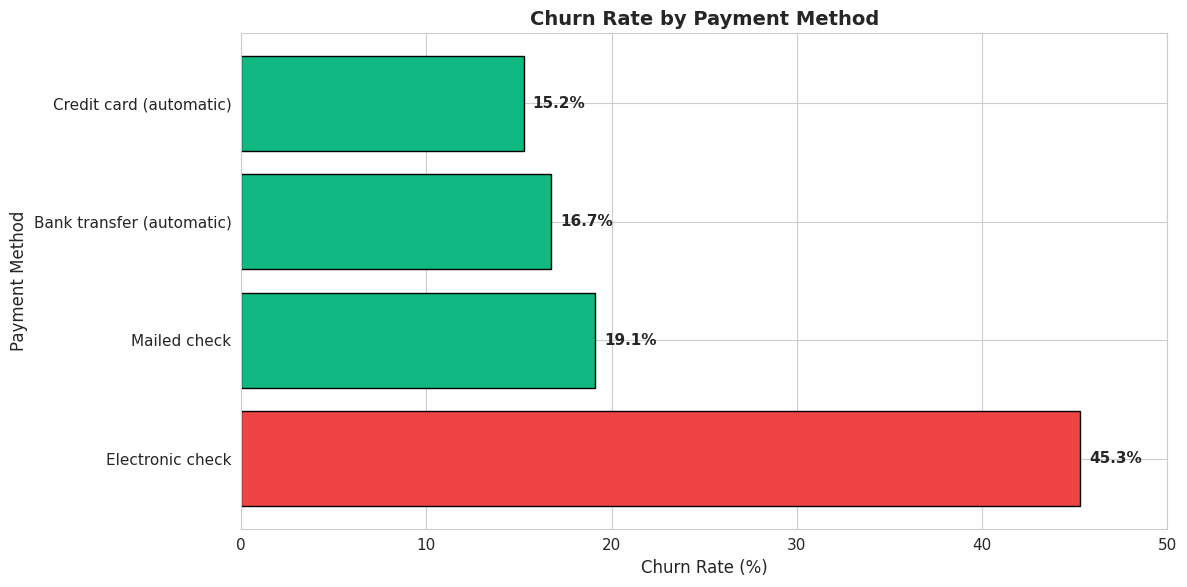


📊 Figure saved: 06_payment_method_vs_churn.png


In [21]:
# Visualization: Payment Method vs Churn
fig, ax = plt.subplots(figsize=(12, 6))

payment_churn = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100).sort_values(ascending=False)
colors = ['#ef4444' if rate > 30 else '#f59e0b' if rate > 20 else '#10b981' for rate in payment_churn.values]
bars = ax.barh(payment_churn.index, payment_churn.values, color=colors, edgecolor='black')
ax.set_title('Churn Rate by Payment Method', fontsize=14, fontweight='bold')
ax.set_xlabel('Churn Rate (%)', fontsize=12)
ax.set_ylabel('Payment Method', fontsize=12)
ax.set_xlim(0, 50)

for bar in bars:
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
            f'{bar.get_width():.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MLCoursework/figures/eda/06_payment_method_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Figure saved: 06_payment_method_vs_churn.png")

### Account Features Insights:
- **Contract Type:** STRONGEST predictor! Month-to-month has ~43% churn vs ~3% for Two-year contracts
- **Payment Method:** Electronic check users have highest churn (~45%) - may indicate less committed customers
- **Paperless Billing:** Customers with paperless billing churn more (~34%) than those without (~16%)

## 8. Numerical Features Analysis <a id='8-numerical'></a>

In [22]:
print("="*80)
print("NUMERICAL FEATURES ANALYSIS")
print("="*80)

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("\nNumerical Features Statistics:")
print("-"*40)
print(df[numerical_cols].describe().round(2))

NUMERICAL FEATURES ANALYSIS

Numerical Features Statistics:
----------------------------------------
        tenure  MonthlyCharges  TotalCharges
count  7043.00         7043.00       7032.00
mean     32.37           64.76       2283.30
std      24.56           30.09       2266.77
min       0.00           18.25         18.80
25%       9.00           35.50        401.45
50%      29.00           70.35       1397.48
75%      55.00           89.85       3794.74
max      72.00          118.75       8684.80


In [23]:
# Statistics by Churn status
print("\nNumerical Features by Churn Status:")
print("-"*40)
print(df.groupby('Churn')[numerical_cols].mean().round(2))


Numerical Features by Churn Status:
----------------------------------------
       tenure  MonthlyCharges  TotalCharges
Churn                                      
No      37.57           61.27       2555.34
Yes     17.98           74.44       1531.80


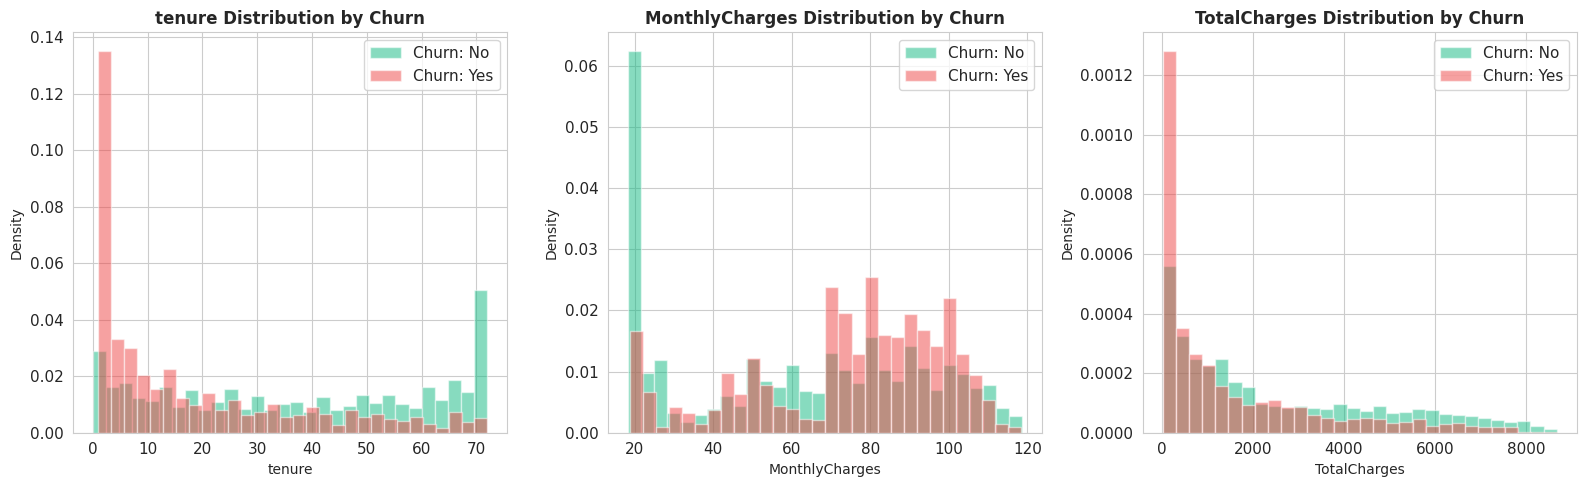


📊 Figure saved: 07_numerical_distributions.png


In [24]:
# Visualization: Distributions of Numerical Features
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]

    # Histogram with KDE for each churn category
    for churn_val, color in COLORS.items():
        data = df[df['Churn'] == churn_val][col].dropna()
        ax.hist(data, bins=30, alpha=0.5, label=f'Churn: {churn_val}', color=color, density=True)

    ax.set_title(f'{col} Distribution by Churn', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MLCoursework/figures/eda/07_numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Figure saved: 07_numerical_distributions.png")

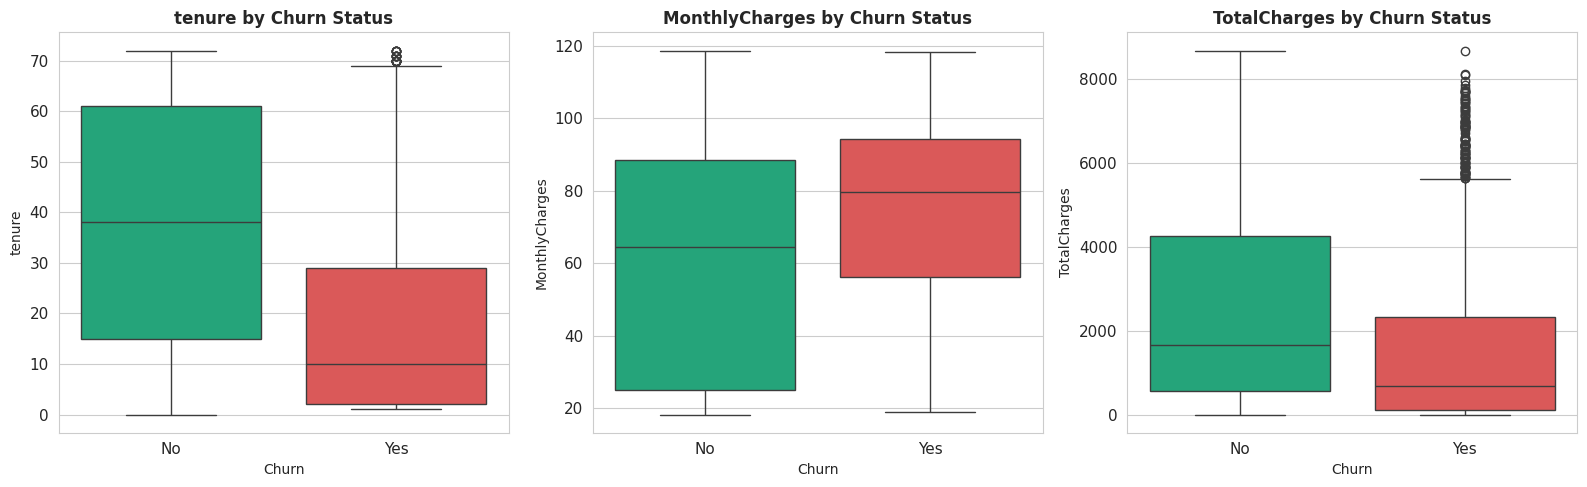


📊 Figure saved: 08_numerical_boxplots.png


In [25]:
# Visualization: Box plots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='Churn', y=col, palette=PALETTE, ax=axes[idx])
    axes[idx].set_title(f'{col} by Churn Status', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Churn', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MLCoursework/figures/eda/08_numerical_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Figure saved: 08_numerical_boxplots.png")

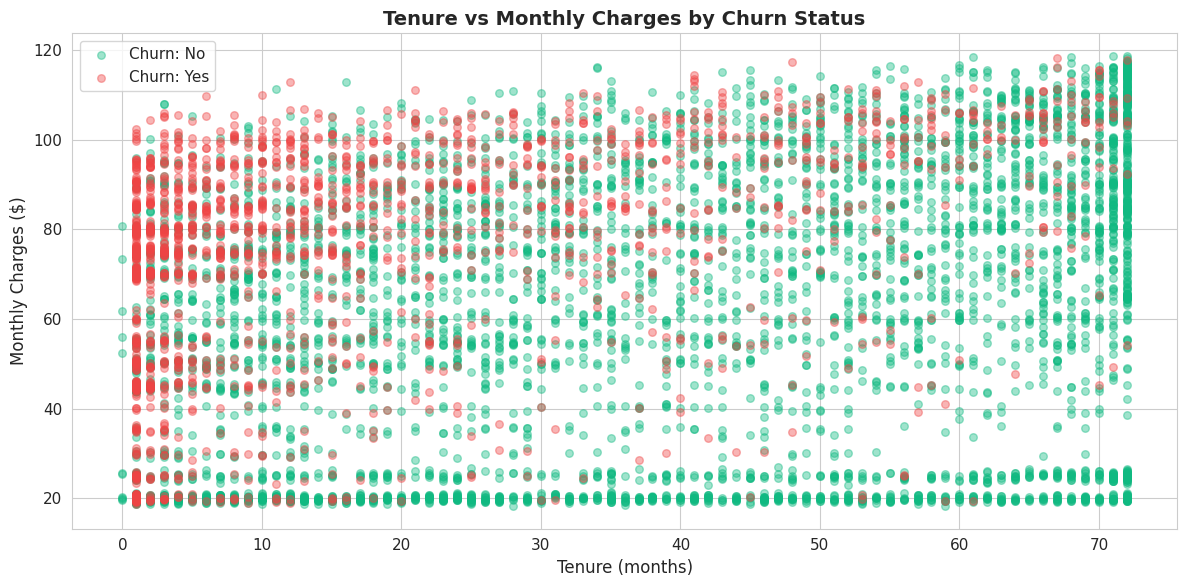


📊 Figure saved: 09_tenure_vs_charges_scatter.png


In [26]:
# Visualization: Tenure vs Monthly Charges scatter plot
fig, ax = plt.subplots(figsize=(12, 6))

for churn_val, color in COLORS.items():
    data = df[df['Churn'] == churn_val]
    ax.scatter(data['tenure'], data['MonthlyCharges'], alpha=0.4, label=f'Churn: {churn_val}', c=color, s=30)

ax.set_title('Tenure vs Monthly Charges by Churn Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Tenure (months)', fontsize=12)
ax.set_ylabel('Monthly Charges ($)', fontsize=12)
ax.legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MLCoursework/figures/eda/09_tenure_vs_charges_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Figure saved: 09_tenure_vs_charges_scatter.png")

### Numerical Features Insights:
- **Tenure:** Churned customers have significantly lower tenure (avg ~18 months vs ~38 months) - new customers are at higher risk
- **Monthly Charges:** Churned customers pay slightly more on average ($74 vs $61) - possibly due to premium services without loyalty
- **Total Charges:** Lower for churned customers due to shorter tenure
- **Scatter Plot Pattern:** New customers with high monthly charges are most likely to churn

## 9. Correlation Analysis <a id='9-correlation'></a>

In [27]:
print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Create numerical encoding for churn
df['Churn_Numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Select numerical columns for correlation
corr_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn_Numeric']
correlation_matrix = df[corr_cols].corr()

print("\nCorrelation Matrix:")
print("-"*40)
print(correlation_matrix.round(3))

print("\nCorrelation with Churn (sorted):")
print("-"*40)
churn_corr = correlation_matrix['Churn_Numeric'].drop('Churn_Numeric').sort_values(key=abs, ascending=False)
for feature, corr in churn_corr.items():
    direction = "↑" if corr > 0 else "↓"
    print(f"  {feature}: {corr:.3f} {direction}")

CORRELATION ANALYSIS

Correlation Matrix:
----------------------------------------
                tenure  MonthlyCharges  TotalCharges  SeniorCitizen  \
tenure           1.000           0.248         0.826          0.017   
MonthlyCharges   0.248           1.000         0.651          0.220   
TotalCharges     0.826           0.651         1.000          0.102   
SeniorCitizen    0.017           0.220         0.102          1.000   
Churn_Numeric   -0.352           0.193        -0.199          0.151   

                Churn_Numeric  
tenure                 -0.352  
MonthlyCharges          0.193  
TotalCharges           -0.199  
SeniorCitizen           0.151  
Churn_Numeric           1.000  

Correlation with Churn (sorted):
----------------------------------------
  tenure: -0.352 ↓
  TotalCharges: -0.199 ↓
  MonthlyCharges: 0.193 ↑
  SeniorCitizen: 0.151 ↑


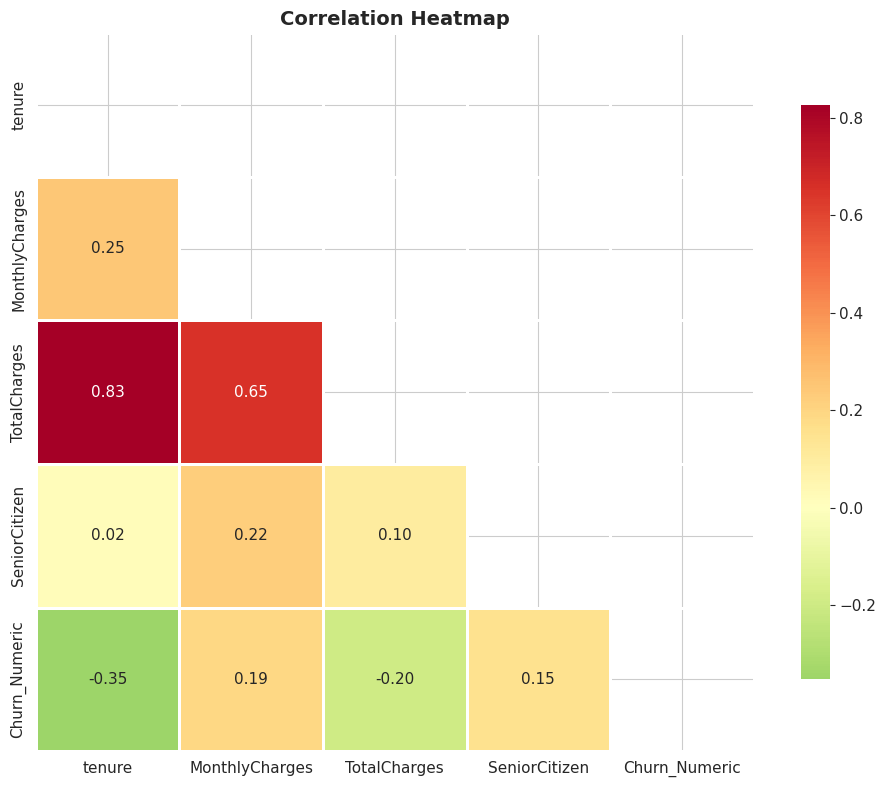


📊 Figure saved: 10_correlation_heatmap.png


In [28]:
# Visualization: Correlation Heatmap
fig, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn_r', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.2f', ax=ax, mask=mask)
ax.set_title('Correlation Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MLCoursework/figures/eda/10_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Figure saved: 10_correlation_heatmap.png")

### Correlation Insights:
- **Tenure vs Churn:** Negative correlation (-0.35) - longer tenure = lower churn probability
- **Monthly Charges vs Churn:** Weak positive correlation (0.19) - higher charges slightly increase churn
- **Senior Citizen vs Churn:** Weak positive correlation (0.15) - seniors slightly more likely to churn
- **Tenure vs TotalCharges:** Strong positive correlation (0.83) - expected relationship
- **Note:** Categorical features require different analysis methods (chi-square tests) for true association measurement

## 10. Key Insights & Conclusions <a id='10-conclusions'></a>

In [29]:
print("="*80)
print("KEY INSIGHTS & CONCLUSIONS")
print("="*80)

print("""
📊 DATASET SUMMARY:
   • 7,043 customers with 20 features
   • Target variable: Churn (26.5% churned, 73.5% retained)
   • Class imbalance ratio: ~2.7:1 (requires handling during modeling)

🎯 TOP CHURN PREDICTORS (by analysis):
   1. Contract Type - Month-to-month customers churn at 43% vs 3% for two-year contracts
   2. Tenure - New customers (low tenure) are at highest churn risk
   3. Internet Service - Fiber optic users churn at 42% (highest)
   4. Payment Method - Electronic check users churn at 45%
   5. Online Security/Tech Support - Customers without these services churn ~40%

📈 HIGH-RISK CUSTOMER PROFILE:
   • Month-to-month contract
   • New customer (tenure < 12 months)
   • Fiber optic internet
   • Pays via electronic check
   • No online security or tech support services
   • No partner or dependents

💡 LOW-RISK CUSTOMER PROFILE:
   • Two-year contract
   • Long tenure (> 36 months)
   • Has security/support services
   • Automatic payment method
   • Has partner and dependents

⚠️ CONSIDERATIONS FOR MODELING:
   • Handle class imbalance (SMOTE, class weights)
   • TotalCharges has 11 missing values (new customers with tenure=0)
   • Contract type is the strongest predictor - ensure proper encoding
   • Consider feature engineering (e.g., tenure groups, charges per month)
   • Use appropriate metrics: F1-score, ROC-AUC (not just accuracy)

🔍 BUSINESS RECOMMENDATIONS:
   • Target retention efforts on month-to-month customers
   • Incentivize longer contracts with discounts
   • Promote security/support service bundles
   • Focus on first-year customer experience (highest churn risk period)
   • Investigate fiber optic service issues
""")

KEY INSIGHTS & CONCLUSIONS

📊 DATASET SUMMARY:
   • 7,043 customers with 20 features
   • Target variable: Churn (26.5% churned, 73.5% retained)
   • Class imbalance ratio: ~2.7:1 (requires handling during modeling)

🎯 TOP CHURN PREDICTORS (by analysis):
   1. Contract Type - Month-to-month customers churn at 43% vs 3% for two-year contracts
   2. Tenure - New customers (low tenure) are at highest churn risk
   3. Internet Service - Fiber optic users churn at 42% (highest)
   4. Payment Method - Electronic check users churn at 45%
   5. Online Security/Tech Support - Customers without these services churn ~40%

📈 HIGH-RISK CUSTOMER PROFILE:
   • Month-to-month contract
   • New customer (tenure < 12 months)
   • Fiber optic internet
   • Pays via electronic check
   • No online security or tech support services
   • No partner or dependents

💡 LOW-RISK CUSTOMER PROFILE:
   • Two-year contract
   • Long tenure (> 36 months)
   • Has security/support services
   • Automatic payment metho

In [30]:
# Summary statistics table
print("\n" + "="*80)
print("CHURN RATE SUMMARY TABLE")
print("="*80)

summary_data = {
    'Feature': ['Contract: Month-to-month', 'Contract: Two year', 'Payment: Electronic check',
                'Payment: Bank transfer', 'Internet: Fiber optic', 'Internet: No service',
                'Online Security: No', 'Online Security: Yes', 'Senior Citizen: Yes', 'Senior Citizen: No'],
    'Churn Rate (%)': [42.7, 2.8, 45.3, 16.7, 41.9, 7.4, 41.8, 14.6, 41.7, 23.6]
}
summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))


CHURN RATE SUMMARY TABLE
                  Feature  Churn Rate (%)
 Contract: Month-to-month            42.7
       Contract: Two year             2.8
Payment: Electronic check            45.3
   Payment: Bank transfer            16.7
    Internet: Fiber optic            41.9
     Internet: No service             7.4
      Online Security: No            41.8
     Online Security: Yes            14.6
      Senior Citizen: Yes            41.7
       Senior Citizen: No            23.6


In [31]:
# Save cleaned data for next steps
print("\n" + "="*80)
print("SAVING DATA FOR PREPROCESSING")
print("="*80)

# Drop helper columns created during EDA
df_clean = df.drop(columns=['SeniorCitizen_Label', 'Churn_Numeric'])
df_clean.to_csv('telco_churn_eda_complete.csv', index=False)
print("\n✅ Data saved to: telco_churn_eda_complete.csv")
print(f"   Shape: {df_clean.shape}")


SAVING DATA FOR PREPROCESSING

✅ Data saved to: telco_churn_eda_complete.csv
   Shape: (7043, 21)


---

## Next Steps:
1. **Data Preprocessing** (Notebook 02): Handle missing values, encode categorical variables, scale features
2. **Decision Tree Model** (Notebook 03): Implement and tune Decision Tree classifier
3. **Neural Network Model** (Notebook 04): Implement and tune Neural Network classifier
4. **Model Comparison** (Notebook 05): Compare models and evaluate results

---
*End of Exploratory Data Analysis*